In [1]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
from ast import literal_eval
import re
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
def process_srg(path):
    with open(path, 'r') as f:
        lines = f.readlines()
        all_match = [re.findall(r'(\d+-\d+ \d+-\d+)+', line) for line in lines]
        all_match = filter(len, all_match)
        srlg_length = [len(srlg) for srlg in all_match]
        if not len(srlg_length):
            return 0, 0
        return len(srlg_length), np.mean(srlg_length)

def process_xml_results(working_folder='results/italy_995/XML/SB0/'):
    xml_results = [ str(x) for x in Path(working_folder).glob('**/*.xml')]
    routing_results = {}
    for xml in xml_results:
        m = re.search('.*_TFA(\S+)_T(\S+)_(\S+)_',xml)
        TFA = float(m.group(1))
        T = float(m.group(2))
        method = m.group(3)
        srg = (xml.split('-')[0] + '.srg').replace('XML', 'SRLG')
        n_srlg, avg_srlg_length = process_srg(srg)
        if 'ilp.' in xml:
            routing = 'gdp-r'
        elif 'ilpferi.' in xml:
            routing = '1+1'
        else:
            continue
        root = ET.parse(xml).getroot()
        result = {
            'SRLG number': n_srlg,
            'SRLG length': avg_srlg_length,
            'AvgCapacity '+routing: float(root[4][5].text),
            'BlockingProbability '+routing: float(root[4][6].text),
            'AverageAvailability '+routing: float(root[4][8].text),
            'MinimumAvailability '+routing: float(root[4][9].text),
        }
        if (TFA, T, method) not in routing_results:
            routing_results[(TFA, T, method)] = result
        else:
            routing_results[(TFA, T, method)].update(result)
    return routing_results

In [16]:
network = 'italy_995'
rr = process_xml_results(f'results/{network}/XML/SB1/')
df = pd.DataFrame.from_dict(rr, 'index')
df.index = pd.MultiIndex.from_tuples(df.index, names=['TFA', 'T', 'method'])
df.sort_values(['TFA', 'T', 'method'], ascending=False, inplace=True)
df = df[sorted(df.columns)]

In [15]:
for method in ['H1', 'H2', 'ILP']:#, 'S', 'NS']:
    df.loc[:,:,method].to_csv(f'results/{network}/{network}_{method}_initial.csv') # .filter(regex='Average|Avg|number')

In [17]:
df.loc[:,:,'ILP']#.filter(regex='Average|Avg|number')#.droplevel(level=['TFA', 'method']).to_csv(f'results/{network}/{network}_initial+1.5.csv')#

AverageAvailability 1+1  AverageAvailability gdp-r  \
TFA    T                                                            
0.0100 0.0100                 0.997384                   0.996800   
       0.0050                 0.997830                   0.996813   
       0.0010                 0.999178                   0.998274   
       0.0005                 0.999653                   0.999571   
0.0050 0.0100                 0.997384                   0.996800   
       0.0050                 0.997830                   0.996813   
       0.0010                 0.999202                   0.998349   
       0.0005                 0.999673                   0.999594   
0.0010 0.0100                 0.997384                   0.996800   
       0.0050                 0.997746                   0.996768   
       0.0010                 0.999083                   0.998176   
       0.0005                 0.999553                   0.999373   
0.0005 0.0100                 0.997384                   0.996800   
       0.0050                 0.997746                   0.996768   
       0.0010                 0.998683                   0.997401   
       0.0005                 0.999439                   0.999052   

               AvgCapacity 1+1  AvgCapacity gdp-r  BlockingProbability 1+1  \
TFA    T                                                                     
0.0100 0.0100          4.71000            4.14000                 0.000000   
       0.0050          5.15333            4.33000                 0.000000   
       0.0010          7.48617            6.79447                 0.156667   
       0.0005          9.43478            9.35931                 0.233333   
0.0050 0.0100          4.71000            4.14000                 0.000000   
       0.0050          5.15333            4.33000                 0.000000   
       0.0010          7.75362            7.09783                 0.080000   
       0.0005          9.56917            9.49012                 0.156667   
0.0010 0.0100          4.71000            4.14000                 0.000000   
       0.0050          5.10667            4.32333                 0.000000   
       0.0010          7.63000            6.91000                 0.000000   
       0.0005          9.15333            8.94667                 0.000000   
0.0005 0.0100          4.71000            4.14000                 0.000000   
       0.0050          5.10667            4.32333                 0.000000   
       0.0010          7.30000            6.37667                 0.000000   
       0.0005          9.16000            8.90667                 0.000000   

               BlockingProbability gdp-r  MinimumAvailability 1+1  \
TFA    T                                                            
0.0100 0.0100                   0.000000                 0.989053   
       0.0050                   0.000000                 0.989053   
       0.0010                   0.156667                 0.993615   
       0.0005                   0.230000                 0.996998   
0.0050 0.0100                   0.000000                 0.989053   
       0.0050                   0.000000                 0.989053   
       0.0010                   0.080000                 0.993615   
       0.0005                   0.156667                 0.996998   
0.0010 0.0100                   0.000000                 0.989053   
       0.0050                   0.000000                 0.989053   
       0.0010                   0.000000                 0.993615   
       0.0005                   0.000000                 0.996993   
0.0005 0.0100                   0.000000                 0.989053   
       0.0050                   0.000000                 0.989053   
       0.0010                   0.000000                 0.992083   
       0.0005                   0.000000                 0.996993   

               MinimumAvailability gdp-r  SRLG length  SRLG number  
TFA    T                                               

In [27]:
df1 = pd.read_csv('results/italy_995/italy_995_H1_initial.csv', index_col=['TFA', 'T'])
df2 = pd.read_csv('results/italy_995/italy_995_H2_initial.csv', index_col=['TFA', 'T'])
df3 = pd.read_csv('results/italy_995/italy_995_ILP_initial.csv', index_col=['TFA', 'T'])

In [7]:
df1.columns

Index(['AverageAvailability 1+1', 'AverageAvailability gdp-r',
       'AvgCapacity 1+1', 'AvgCapacity gdp-r', 'BlockingProbability 1+1',
       'BlockingProbability gdp-r', 'MinimumAvailability 1+1',
       'MinimumAvailability gdp-r', 'SRLG length', 'SRLG number'],
      dtype='object')

In [28]:
df = pd.concat([df1, df2, df3], axis=1)

In [29]:
df.columns = [name + ' H1' for name in df1.columns] + [name + ' H2' for name in df1.columns] + [name + ' ILP' for name in df1.columns]

In [22]:
df.to_csv('results/italy_995/italy_995_ilp.csv', float_format='%.6f')

In [2]:
method = 'H2'
df1 = pd.read_csv(f'results/italy_995/italy_995_{method}_initial.csv', index_col=['TFA', 'T'])
df2 = pd.read_csv(f'results/italy_995/italy_995_{method}_SB0.csv', index_col=['TFA', 'T'])
df3 = pd.read_csv(f'results/italy_995/italy_995_{method}_SB1.csv', index_col=['TFA', 'T'])

aa_cols = ['AverageAvailability 1+1', 'AverageAvailability gdp-r', 'SRLG number', 'BlockingProbability 1+1']
df = pd.concat([df1[aa_cols], df2[aa_cols], df3[aa_cols]], axis=1)
df.columns = [name + ' init' for name in aa_cols] + [name + ' SB0' for name in aa_cols] + [name + ' SB1' for name in aa_cols]

In [22]:
[t for tfa, t, m in df.index]

[0.01,
 0.0023,
 0.00205,
 0.0019,
 0.00155,
 0.0012,
 0.0011,
 0.00095,
 0.00085,
 0.00065,
 0.00055,
 0.0005,
 0.00045,
 0.0004,
 0.00035,
 0.0003,
 0.00025,
 0.0002]

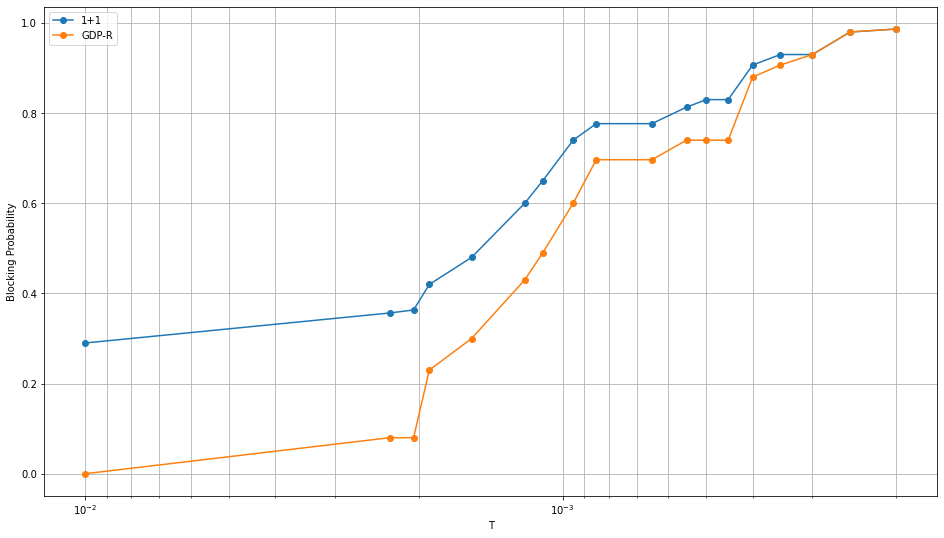

In [33]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot([t for tfa, t, m in df.index], df['BlockingProbability 1+1'], 'o-', label='1+1')
ax.plot([t for tfa, t, m in df.index], df['BlockingProbability gdp-r'], 'o-', label='GDP-R')
ax.invert_xaxis()
ax.set_xscale('log')
ax.grid(True, which="both", ls="-")

ax.set_xlabel('T')
ax.set_ylabel('Blocking Probability')
ax.legend()